In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Reading the dataset

In [2]:
df=pd.read_csv("OnlineRetail.csv",encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Understanding the data

In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.shape

(541909, 8)

In [5]:
col_names=list(df.columns)

for i in col_names:
    print("Value counts for {}:\n{}".format(i,df[i].value_counts()))
    print("-"*25)

Value counts for InvoiceNo:
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C554339       1
C543780       1
537599        1
566325        1
C549045       1
Name: InvoiceNo, Length: 25900, dtype: int64
-------------------------
Value counts for StockCode:
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21134        1
90178B       1
84966A       1
16053        1
85036a       1
Name: StockCode, Length: 4070, dtype: int64
-------------------------
Value counts for Description:
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
HEN HOUSE W CHICK IN NEST                1
wet?                                     1
Amazon Adjustment                        1
COUNTRY COTTAGE  DOORSTOP GREEN          1
PI

From the above data, we can see that Country column is categorical in nature (non - ordinal nature). InvoiceNo, StockCode and Description are strings. Date column has a string data type and not datetime. 

In [6]:
# checking for missing data
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#dropping the missing rows
df.dropna(inplace=True)

In [8]:
df.reset_index(inplace=True,drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
## There are some negative quantities also in the datset as minimum quantity is negative
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [12]:
df.drop(df[df["Quantity"]<0].index, inplace =True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [13]:
df.reset_index(inplace=True,drop=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


### RFM Analysis

As we have to segment customers, we can use the RFM technique to segment customers. R, F and M stands for Recency, Frequency and Monetary respectively. This way, we will understand the customer lifetime and frequency and therefore, decide what customers we can give discounts too.

In [14]:
# First, we will create the monetary dataset
df["Amount"] = df["UnitPrice"]*df["Quantity"]

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [16]:
# Now we can group these based upon customer ID
mon_df = pd.DataFrame(df.groupby("CustomerID")["Amount"].sum() )
mon_df.reset_index(inplace=True)


In [17]:
mon_df

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [18]:
# Recency would depend upon date. so, converting date to date_time() type
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
Amount         397924 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
df # The date format here is year - month - date h:m:s

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60


In [20]:
#Most recent date in dataset 
max_date = df["InvoiceDate"].max()
max_date

Timestamp('2011-12-10 17:19:00')

In [21]:
date_df = pd.DataFrame(df.groupby("CustomerID")["InvoiceDate"].max())
date_df

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-10-31 12:25:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-07-03 09:52:00
18281.0,2011-12-06 10:53:00
18282.0,2011-05-08 13:35:00


In [22]:
date_df.reset_index(inplace=True)
date_df

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-10-31 12:25:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
4334,18280.0,2011-07-03 09:52:00
4335,18281.0,2011-12-06 10:53:00
4336,18282.0,2011-05-08 13:35:00
4337,18283.0,2011-11-30 12:59:00


In [23]:
date_df["Recency"]=max_date-date_df["InvoiceDate"]
date_df

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,326 days 07:18:00
1,12347.0,2011-10-31 12:25:00,40 days 04:54:00
2,12348.0,2011-09-25 13:13:00,76 days 04:06:00
3,12349.0,2011-11-21 09:51:00,19 days 07:28:00
4,12350.0,2011-02-02 16:01:00,311 days 01:18:00
...,...,...,...
4334,18280.0,2011-07-03 09:52:00,160 days 07:27:00
4335,18281.0,2011-12-06 10:53:00,4 days 06:26:00
4336,18282.0,2011-05-08 13:35:00,216 days 03:44:00
4337,18283.0,2011-11-30 12:59:00,10 days 04:20:00


In [24]:
date_df["Recency"].dtype
#date_df["Recency"].astype(object)

dtype('<m8[ns]')

In [25]:
date_df["Recency"]=date_df["Recency"].dt.days
#date_df["Recency"].apply(lambda x: x[:x.index('days')])
date_df

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:01:00,326
1,12347.0,2011-10-31 12:25:00,40
2,12348.0,2011-09-25 13:13:00,76
3,12349.0,2011-11-21 09:51:00,19
4,12350.0,2011-02-02 16:01:00,311
...,...,...,...
4334,18280.0,2011-07-03 09:52:00,160
4335,18281.0,2011-12-06 10:53:00,4
4336,18282.0,2011-05-08 13:35:00,216
4337,18283.0,2011-11-30 12:59:00,10


In [26]:
# Constructing Recency df that has only recency and customer ID
rec_df=date_df[["CustomerID","Recency"]]
rec_df

,CustomerID,Recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311
...,...,...
4334,18280.0,160
4335,18281.0,4
4336,18282.0,216
4337,18283.0,10


In [27]:
date_df["Recency"].dtype

dtype('int64')

In [28]:
# Constructing frequency df - How frequently our customer buys from store
# We can identify this  using invoices - number of invoices linked to a customer (1 invoice is for 1 dataset it seems)
freq_df=pd.DataFrame(df.groupby("CustomerID")["InvoiceNo"].count())
freq_df

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17
...,...
18280.0,10
18281.0,7
18282.0,12


In [29]:
freq_df.reset_index(inplace=True)
freq_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [30]:
# checking shapes of dataframes to be merged
#mon_df.shape
#rec_df.shape
#freq_df.shape

In [31]:
result = pd.merge(mon_df, rec_df, on="CustomerID")
result

,CustomerID,Amount,Recency
0,12346.0,77183.60,326
1,12347.0,4310.00,40
2,12348.0,1797.24,76
3,12349.0,1757.55,19
4,12350.0,334.40,311
...,...,...,...
4334,18280.0,180.60,160
4335,18281.0,80.82,4
4336,18282.0,178.05,216
4337,18283.0,2094.88,10


In [32]:
final_df=pd.merge(result,freq_df,on="CustomerID")
final_df

,CustomerID,Amount,Recency,InvoiceNo
0,12346.0,77183.60,326,1
1,12347.0,4310.00,40,182
2,12348.0,1797.24,76,31
3,12349.0,1757.55,19,73
4,12350.0,334.40,311,17
...,...,...,...,...
4334,18280.0,180.60,160,10
4335,18281.0,80.82,4,7
4336,18282.0,178.05,216,12
4337,18283.0,2094.88,10,756


### Outlier Detection

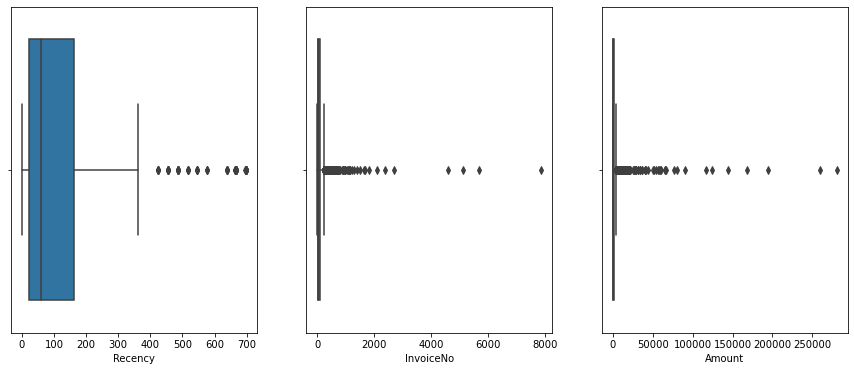

In [33]:
# the above datset is our final dataset. Next step would be checking for outliers
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.set_style("whitegrid")
sns.boxplot(x=final_df["Recency"],ax=ax[0])
sns.boxplot(x=final_df["InvoiceNo"],ax=ax[1])
sns.boxplot(x=final_df["Amount"],ax=ax[2])
plt.show()

In the above plots, we can see that all the three features have outliers. The black dots above show outliers. For recency, values above 400 show outliers but for InvoiceNo and Amount, we have to calculate the exact number to get a better idea.


### Outliers Removal using IQR

In [34]:
# Outlier detection and removal using Inter Quartile Range
# For recency - Detection
Q1=np.percentile(final_df["Recency"],25,interpolation="midpoint")
Q3=np.percentile(final_df["Recency"],75,interpolation="midpoint")
IQR=Q3-Q1
print(IQR)

upper = np.where(final_df["Recency"] >= (Q3+1.5*IQR))
lower = np.where(final_df["Recency"] <= (Q1-1.5*IQR))# Returns a list of all the indexes where we have outliers
''' Removing the Outliers '''
final_df.drop(upper[0], inplace = True)
final_df.drop(lower[0], inplace = True)
final_df

139.5


,CustomerID,Amount,Recency,InvoiceNo
0,12346.0,77183.60,326,1
1,12347.0,4310.00,40,182
2,12348.0,1797.24,76,31
3,12349.0,1757.55,19,73
4,12350.0,334.40,311,17
...,...,...,...,...
4334,18280.0,180.60,160,10
4335,18281.0,80.82,4,7
4336,18282.0,178.05,216,12
4337,18283.0,2094.88,10,756


In [35]:
final_df.reset_index(inplace=True,drop=True)

In [36]:
final_df[final_df["Amount"] <= (Q1-1.5*IQR)]

,CustomerID,Amount,Recency,InvoiceNo


In [37]:
final_df

,CustomerID,Amount,Recency,InvoiceNo
0,12346.0,77183.60,326,1
1,12347.0,4310.00,40,182
2,12348.0,1797.24,76,31
3,12349.0,1757.55,19,73
4,12350.0,334.40,311,17
...,...,...,...,...
4254,18280.0,180.60,160,10
4255,18281.0,80.82,4,7
4256,18282.0,178.05,216,12
4257,18283.0,2094.88,10,756


In [38]:
# Outlier detection and removal using Inter Quartile Range
# For Amount - Detection
Q1=np.percentile(final_df["Amount"],25,interpolation="midpoint")
Q3=np.percentile(final_df["Amount"],75,interpolation="midpoint")
IQR=Q3-Q1
print(IQR)

#upper = np.where(final_df["Amount"] >= (Q3+1.5*IQR))
#lower = np.where(final_df["Amount"] <= (Q1-1.5*IQR))# Returns a list of all the indexes where we have outliers
''' Removing the Outliers '''
final_df.drop(final_df[final_df["Amount"] >= (Q3+1.5*IQR)].index, inplace = True)
final_df.drop(final_df[final_df["Amount"] <= (Q1-1.5*IQR)].index, inplace = True)
final_df

1382.955000000001


,CustomerID,Amount,Recency,InvoiceNo
2,12348.0,1797.24,76,31
3,12349.0,1757.55,19,73
4,12350.0,334.40,311,17
5,12352.0,2506.04,73,85
6,12353.0,89.00,204,4
...,...,...,...,...
4254,18280.0,180.60,160,10
4255,18281.0,80.82,4,7
4256,18282.0,178.05,216,12
4257,18283.0,2094.88,10,756


In [39]:
final_df.reset_index(inplace=True,drop=True)

In [40]:
final_df

,CustomerID,Amount,Recency,InvoiceNo
0,12348.0,1797.24,76,31
1,12349.0,1757.55,19,73
2,12350.0,334.40,311,17
3,12352.0,2506.04,73,85
4,12353.0,89.00,204,4
...,...,...,...,...
3847,18280.0,180.60,160,10
3848,18281.0,80.82,4,7
3849,18282.0,178.05,216,12
3850,18283.0,2094.88,10,756


In [41]:
# Outlier detection and removal using Inter Quartile Range
# For InvoiceNo - Detection
Q1=np.percentile(final_df["InvoiceNo"],25,interpolation="midpoint")
Q3=np.percentile(final_df["InvoiceNo"],75,interpolation="midpoint")
IQR=Q3-Q1
print(IQR)

#upper = np.where(final_df["InvoiceNo"] >= (Q3+1.5*IQR))
#lower = np.where(final_df["InvoiceNo"] <= (Q1-1.5*IQR))# Returns a list of all the indexes where we have outliers
''' Removing the Outliers '''
final_df.drop(final_df[final_df["InvoiceNo"] >= (Q3+1.5*IQR)].index, inplace = True)
final_df.drop(final_df[final_df["InvoiceNo"] <= (Q1-1.5*IQR)].index, inplace = True)
final_df

66.0


,CustomerID,Amount,Recency,InvoiceNo
0,12348.0,1797.24,76,31
1,12349.0,1757.55,19,73
2,12350.0,334.40,311,17
3,12352.0,2506.04,73,85
4,12353.0,89.00,204,4
...,...,...,...,...
3846,18278.0,173.90,74,9
3847,18280.0,180.60,160,10
3848,18281.0,80.82,4,7
3849,18282.0,178.05,216,12


In [42]:
final_df.reset_index(inplace=True,drop=True)

In [43]:
final_df

,CustomerID,Amount,Recency,InvoiceNo
0,12348.0,1797.24,76,31
1,12349.0,1757.55,19,73
2,12350.0,334.40,311,17
3,12352.0,2506.04,73,85
4,12353.0,89.00,204,4
...,...,...,...,...
3603,18278.0,173.90,74,9
3604,18280.0,180.60,160,10
3605,18281.0,80.82,4,7
3606,18282.0,178.05,216,12


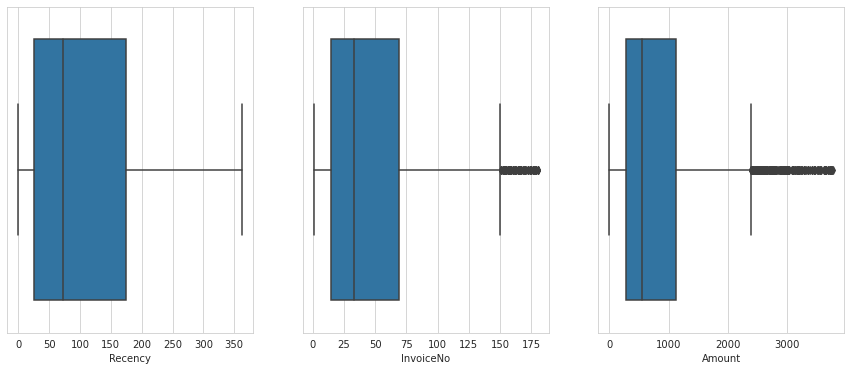

In [44]:
# Checking if outliers got removed
fig,ax=plt.subplots(1,3,figsize=(15,6))
sns.set_style("whitegrid")
sns.boxplot(x=final_df["Recency"],ax=ax[0])
sns.boxplot(x=final_df["InvoiceNo"],ax=ax[1])
sns.boxplot(x=final_df["Amount"],ax=ax[2])
plt.show()

In [45]:
# The data looks in a better shape now.

### scaling data

In [46]:
#We can see a lot of outliers in data so, we will try to scale the data using Standard Scaler
model_df= final_df[["Amount","Recency","InvoiceNo"]]
st=StandardScaler()
model_df=st.fit_transform(model_df)
model_df

array([[ 1.24522042, -0.3273989 , -0.39055957],
       [ 1.19426587, -0.91680118,  0.61225034],
       [-0.63279322,  2.10259297, -0.72482954],
       ...,
       [-0.95834264, -1.07190705, -0.96359381],
       [-0.83351746,  1.12025583, -0.84421167],
       [ 1.29662431, -1.11326861,  0.54062106]])

In [47]:
model_df=pd.DataFrame(model_df)


In [48]:
model_df.rename(columns={0:"Amount",1:"Recency",2:"InvoiceNo"},inplace=True)
model_df

,Amount,Recency,InvoiceNo
0,1.245220,-0.327399,-0.390560
1,1.194266,-0.916801,0.612250
2,-0.632793,2.102593,-0.724830
3,2.155187,-0.358420,0.898767
4,-0.947841,0.996171,-1.035223
...,...,...,...
3603,-0.838845,-0.348080,-0.915841
3604,-0.830244,0.541194,-0.891965
3605,-0.958343,-1.071907,-0.963594
3606,-0.833517,1.120256,-0.844212


### Determining Optimum number of Clusters

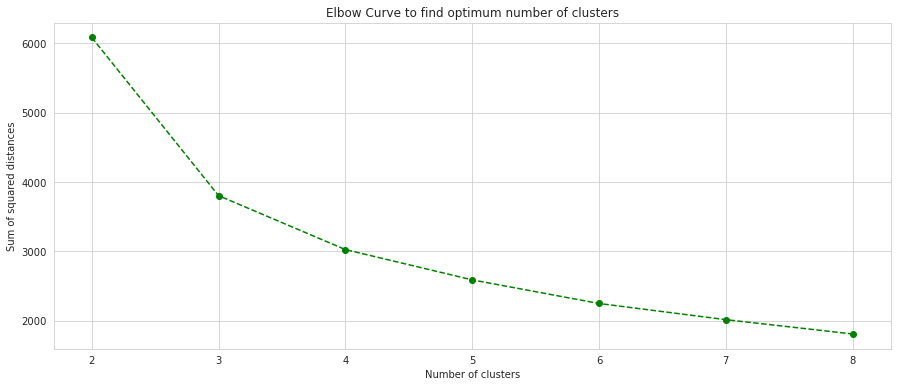

In [49]:
# Using Elbow method to find optimum number of clusters
from sklearn.cluster import KMeans
sum_of_squared_distance = []
n_clusters = list(range(2,9))
for i in n_clusters:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(model_df)
    sum_of_squared_distance.append(kmeans.inertia_)
plt.figure(figsize=(15,6))
plt.plot(n_clusters,sum_of_squared_distance,"go--")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Curve to find optimum number of clusters")
plt.show()

In [50]:
# From the above curve, we can say that k=3 is the optimum cluster size. So, training model on k=3
kmeans2=KMeans(n_clusters=3)
kmeans2.fit(model_df)



KMeans(n_clusters=3)

In [51]:
final_df["Clusters"]=kmeans2.labels_
final_df

,CustomerID,Amount,Recency,InvoiceNo,Clusters
0,12348.0,1797.24,76,31,1
1,12349.0,1757.55,19,73,2
2,12350.0,334.40,311,17,0
3,12352.0,2506.04,73,85,2
4,12353.0,89.00,204,4,0
...,...,...,...,...,...
3603,18278.0,173.90,74,9,1
3604,18280.0,180.60,160,10,0
3605,18281.0,80.82,4,7,1
3606,18282.0,178.05,216,12,0


### Evaluating models

In [54]:
# Silhoutte Score to check how good our model is
from sklearn.metrics import silhouette_score
score = silhouette_score(model_df,final_df["Clusters"])
print("Silhouette Score for our model is:{}".format(score))

Silhouette Score for our model is:0.41948859621139467


The above score is not too bad and quite close to what others have achieved for this dataset. This score ranges from -1 to 1. A score of -1 shows allocation of incorrect cluster for a data point and a positive score shows that a cluster's samples are away from other cluster's samples. A score of 0 shows that samples are closer to the decision boundary separating two clusters. So, in our case, the clustering is done the right way.

### Plotting Graphs

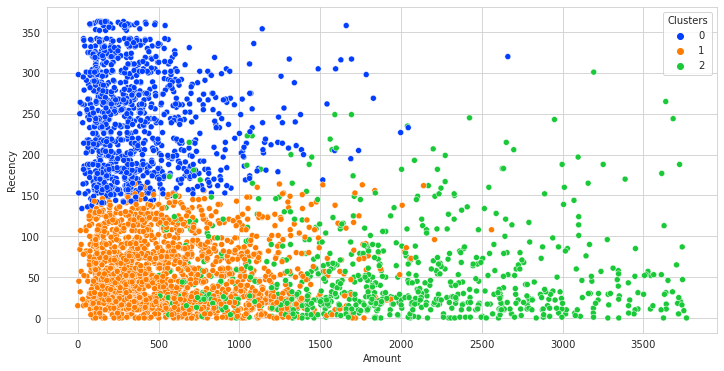

In [55]:
# Plotting Scatterplot for for Amount and Recency
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=final_df["Amount"], y = final_df["Recency"], hue=final_df["Clusters"], palette='bright')
plt.show()

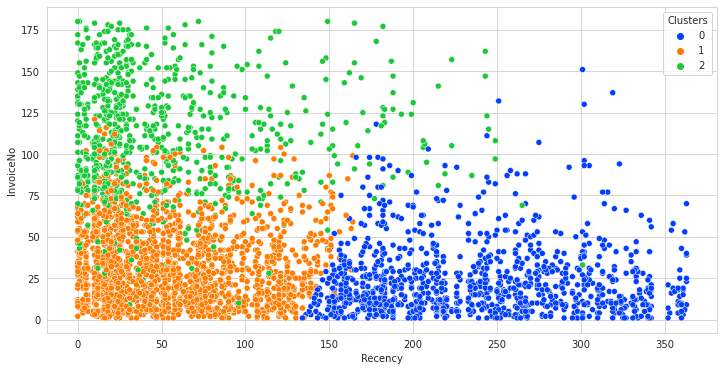

In [56]:
# Plotting Scatterplot for for Recency and Number of Invoices
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=final_df["Recency"], y = final_df["InvoiceNo"], hue=final_df["Clusters"], palette='bright')
plt.show()

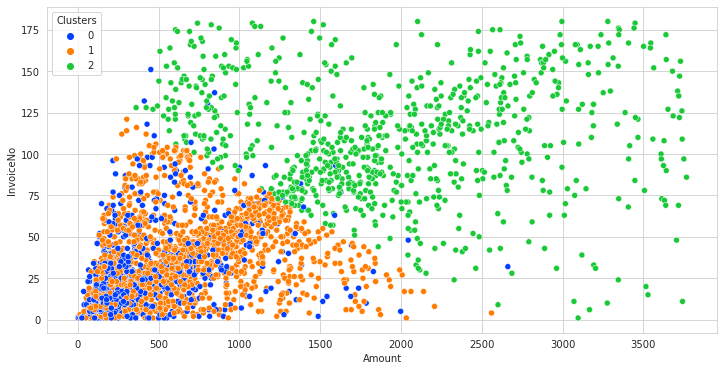

In [57]:
# Plotting Scatterplot for for Amount and Number of Invoices
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=final_df["Amount"], y = final_df["InvoiceNo"], hue=final_df["Clusters"], palette='bright')
plt.show()